# Customer Churn Prediction

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
import time
from datetime import datetime
from sklearn.metrics import mean_squared_error
import ast
from collections import Counter

## Exploratory Data Analysis

### A. Data Description and Variable Identification

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

Data fields

state: string. 2-letter code of the US state of customer residence

account_length: numerical. Number of months the customer has been with the current telco provider

area_code: string="area_code_AAA" where AAA = 3 digit area code.

international_plan: (yes/no). The customer has international plan.

voice_mail_plan: (yes/no). The customer has voice mail plan.

number_vmail_messages: numerical. Number of voice-mail messages.

total_day_minutes: numerical. Total minutes of day calls.

total_day_calls: numerical. Total number of day calls.

total_day_charge: numerical. Total charge of day calls.

total_eve_minutes: numerical. Total minutes of evening calls.

total_eve_calls: numerical. Total number of evening calls.

total_eve_charge: numerical. Total charge of evening calls.

total_night_minutes: numerical. Total minutes of night calls.

total_night_calls: numerical. Total number of night calls.

total_night_charge: numerical. Total charge of night calls.

total_intl_minutes: numerical. Total minutes of international calls.

total_intl_calls: numerical. Total number of international calls.

total_intl_charge: numerical. Total charge of international calls

number_customer_service_calls: numerical. Number of calls to customer service

churn: (yes/no). Customer churn - target variable.

In [2]:
# Loading Dataset

train_data = pd.read_csv("train.csv")

In [3]:
# Training Data Overview

print("Training Dataset:")
train_data.head()

Training Dataset:


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# Shape of Dataset

print("The shape of original dataset: ",train_data.shape)

The shape of original dataset:  (4250, 20)


In [5]:
# Datatype Overview

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Categorical Variables: state, area_code, international_plan, voice_mail_plan,churn

Numerical Variables: account_length, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls,total_eve_charge, total_night_minutes, total_night_calls,total_night_charge total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls

### B. Univariate Analysis

In [6]:
# Replacing Yes/No variables by 1/0

train_data = train_data.replace({'churn':{'yes':1,"no":0}})
train_data = train_data.replace({'voice_mail_plan':{'yes':1,"no":0}})
train_data = train_data.replace({'international_plan':{'yes':1,"no":0}})
train_data = train_data.replace({'area_code':{'area_code_415':2,"area_code_408":1,"area_code_510":3}})

In [7]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,1,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,2,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,3,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [8]:
# Checking statistical measures

train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
area_code,4250.0,1.992941,0.709978,1.0,1.0000,2.00,2.0000,3.00
international_plan,4250.0,0.093176,0.290714,0.0,0.0000,0.00,0.0000,1.00
voice_mail_plan,4250.0,0.261647,0.439583,0.0,0.0000,0.00,1.0000,1.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00


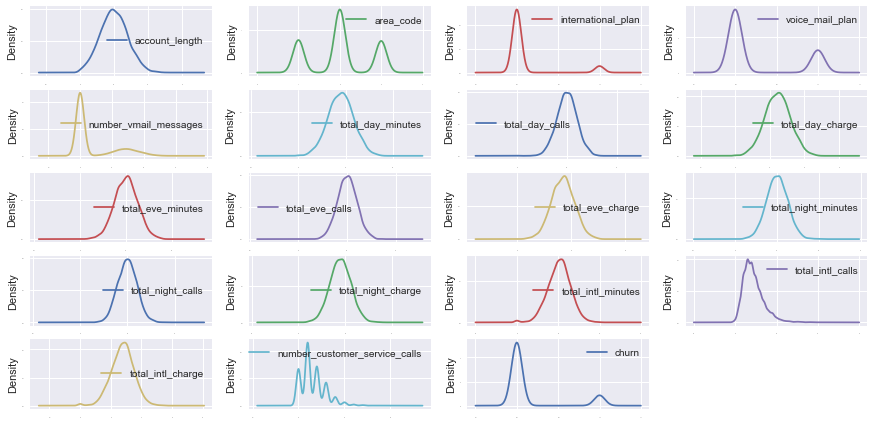

In [9]:
# Checking distributions of the numerical variables

train_data.plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

Most of the variables are normally distributed. Though there are few variables which are skewed and needs some transformations, which we will be peroforming in later sections. 

In [10]:
# Checking skewness of variables

num_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
            'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls',
            'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

for i in num_cols:
    print("The skewness of {} is {}".format(i, train_data[i].skew()))

The skewness of account_length is 0.12232732438422539
The skewness of number_vmail_messages is 1.373091038123339
The skewness of total_day_minutes is -0.006910229800877682
The skewness of total_day_calls is -0.08581246336912247
The skewness of total_day_charge is -0.0069125262282953735
The skewness of total_eve_minutes is -0.030414586244988526
The skewness of total_eve_calls is -0.020811823634835278
The skewness of total_eve_charge is -0.03038789084081965
The skewness of total_night_minutes is 0.008490819348496867
The skewness of total_night_calls is 0.005273110226931511
The skewness of total_night_charge is 0.008444754040695448
The skewness of total_intl_minutes is -0.2413595393894869
The skewness of total_intl_calls is 1.360122209275675
The skewness of total_intl_charge is -0.2416706660676994
The skewness of number_customer_service_calls is 1.0826915855656591


The variables which are heavily skewed are: 'number_vmail_messages', 'total_intl_minutes' and 'number_customer_service_calls'. 

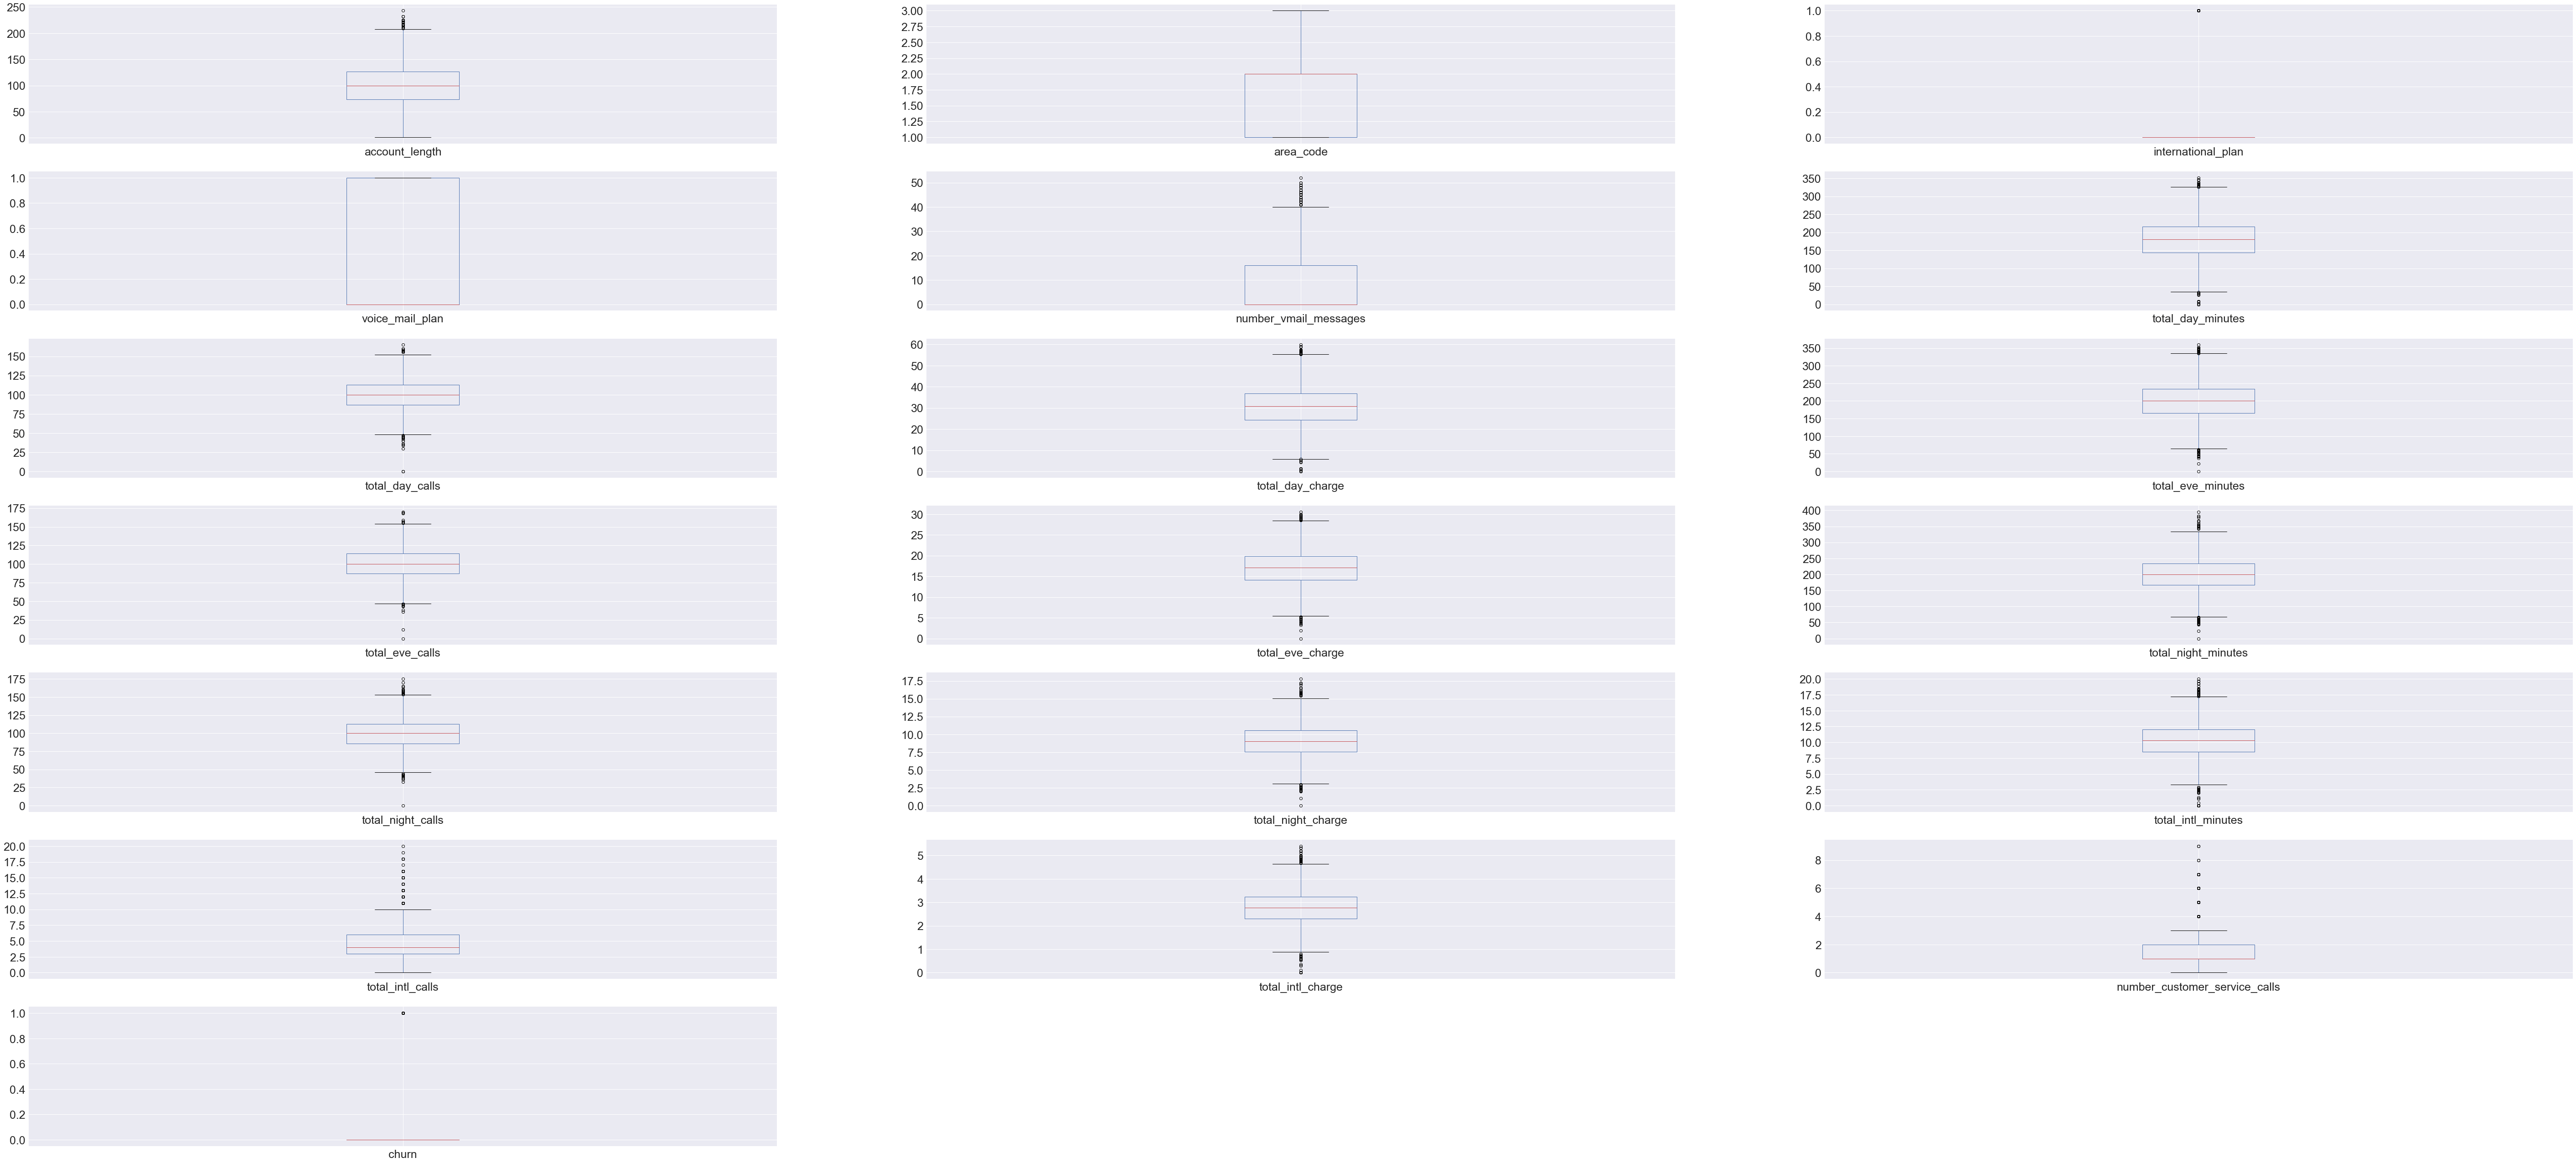

In [11]:
# Box Plot of numerical variables

train_data.plot(kind='box', subplots=True, layout=(15,3), sharex=False, sharey=False,fontsize=25, figsize = (100, 100))
plt.show()

As we can intepret from the box plot that all the variables have some outliers so we will be doing outlier treatment for such datapoints. We will use log transformation to make normally distributed or less skewed as log transformation is not sensative to outliers.

In [12]:
# Checking the categories resent in state variable and seeing count against them

train_data.groupby('state')['state'].agg('count')

state
AK     61
AL    101
AR     71
AZ     77
CA     39
CO     80
CT     88
DC     72
DE     80
FL     76
GA     64
HI     77
IA     62
ID    106
IL     79
IN     83
KS     87
KY     85
LA     69
MA     89
MD     86
ME     89
MI     87
MN    108
MO     80
MS     82
MT     80
NC     80
ND     67
NE     73
NH     78
NJ     96
NM     78
NV     83
NY     96
OH     95
OK     78
OR     99
PA     67
RI     87
SC     72
SD     75
TN     79
TX     98
UT     97
VA    100
VT     86
WA     80
WI     94
WV    139
WY     95
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

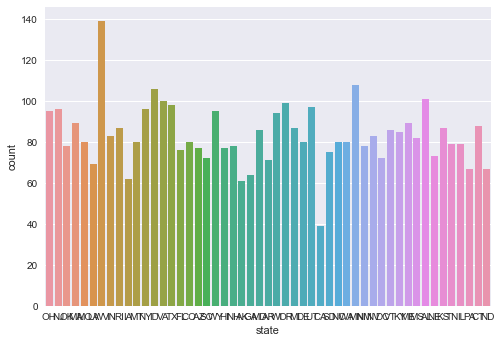

In [13]:
# Count plot for state variable

sns.countplot(x="state", data=train_data)

In [14]:
# Checking different area_codes present in the dataset and count against them

train_data.groupby('area_code')['area_code'].agg('count')

area_code
1    1086
2    2108
3    1056
Name: area_code, dtype: int64

<AxesSubplot:xlabel='area_code', ylabel='count'>

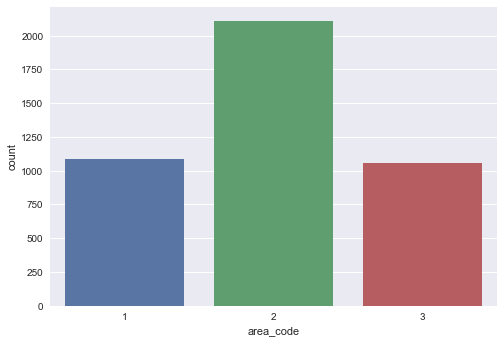

In [15]:
# Count plot for area_code variable

sns.countplot(x="area_code", data=train_data)

In [16]:
# Checking on how many people have availed international_plan 

train_data.groupby('international_plan')['international_plan'].agg('count')

international_plan
0    3854
1     396
Name: international_plan, dtype: int64

<AxesSubplot:xlabel='international_plan', ylabel='count'>

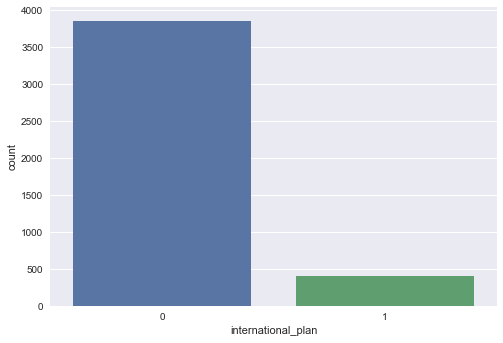

In [17]:
# Count plot for international_plan variable

sns.countplot(x="international_plan", data=train_data)

In [18]:
# Checking on how many people have availed voice_mail_plan

train_data.groupby('voice_mail_plan')['voice_mail_plan'].agg('count')

voice_mail_plan
0    3138
1    1112
Name: voice_mail_plan, dtype: int64

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

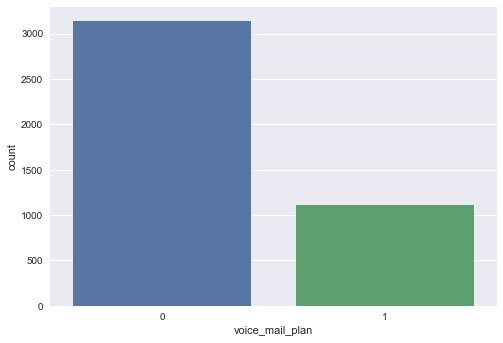

In [19]:
# Count plot for international_plan variable

sns.countplot(x="voice_mail_plan", data=train_data)

In [20]:
# Checking on how many people have changes their provider based on the data

train_data.groupby('churn')['churn'].agg('count')

churn
0    3652
1     598
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

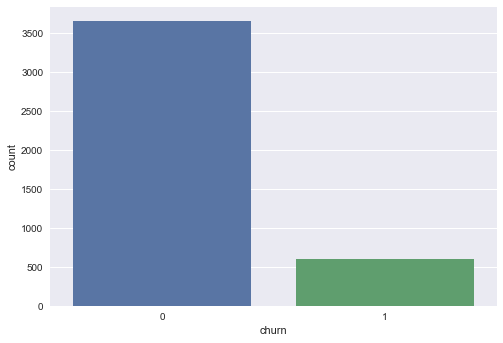

In [21]:
# Count plot for international_plan variable

sns.countplot(x="churn", data=train_data)

### C. Outlier Treatment

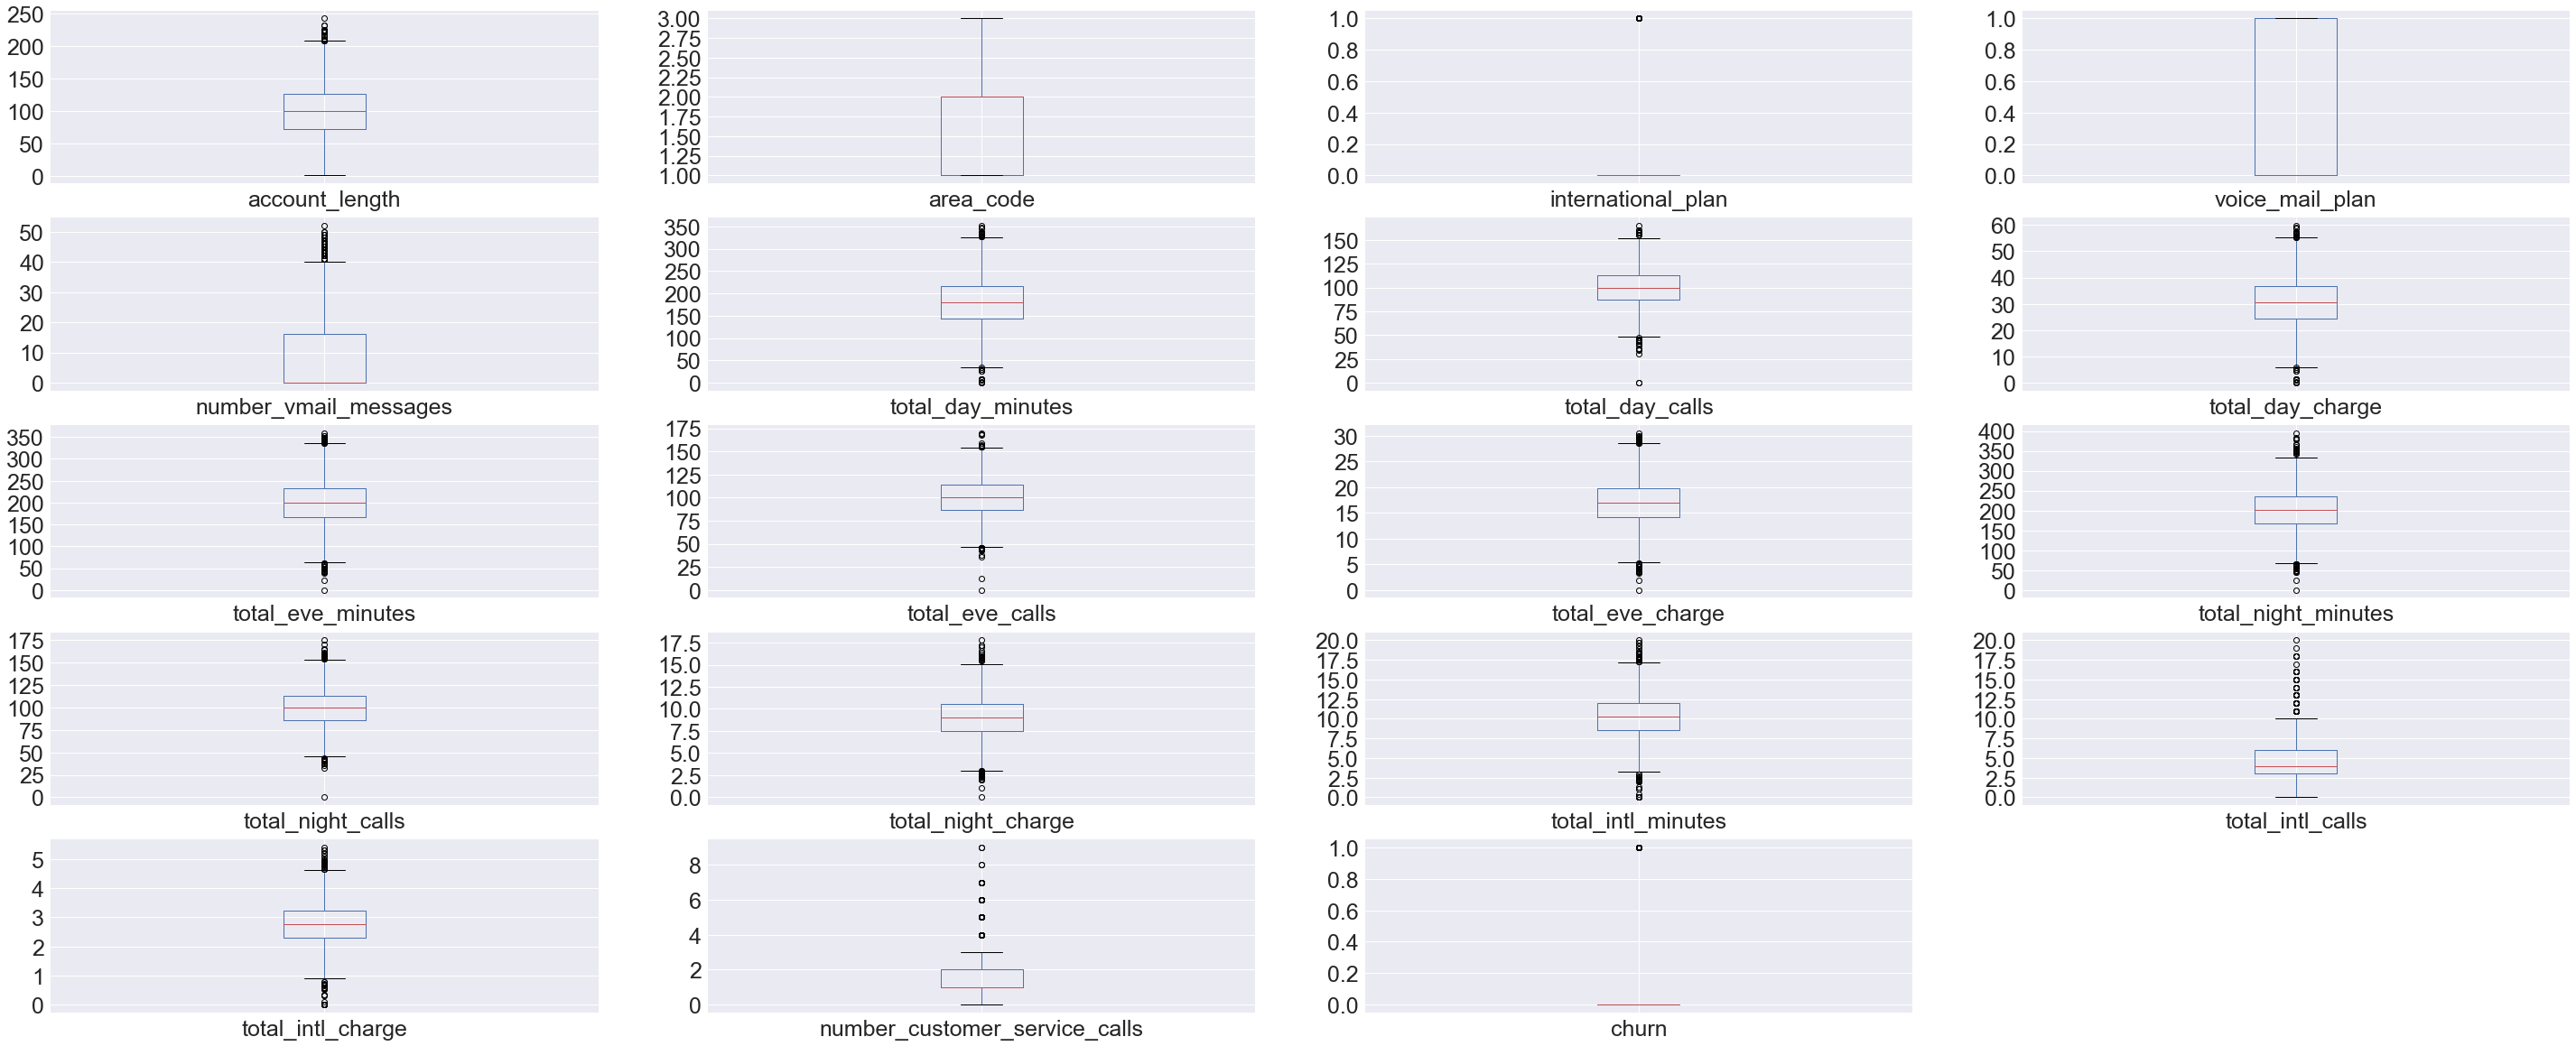

In [22]:
train_data.plot(kind='box', subplots=True, layout=(12,4), sharex=False, sharey=False,fontsize=25, figsize = (50, 50))
plt.show()

In [23]:
# Function to calculate the low and high range for each column

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[10,90])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [24]:
# Outlier Treatment

train_data1 = train_data.copy()

num_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
            'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls',
            'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

for column in train_data.columns:
    if train_data[column].dtype != 'object': 
        lr,ur=remove_outlier(train_data[column])
        train_data1[column]=np.where(train_data[column]>ur,ur,train_data1[column])
        train_data1[column]=np.where(train_data[column]<lr,lr,train_data1[column])

In [25]:
train_data1.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,2.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0
1,NJ,137.0,2.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0
2,OH,84.0,1.0,0.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0
3,OK,75.0,2.0,0.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0
4,MA,121.0,3.0,0.0,1.0,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0.0


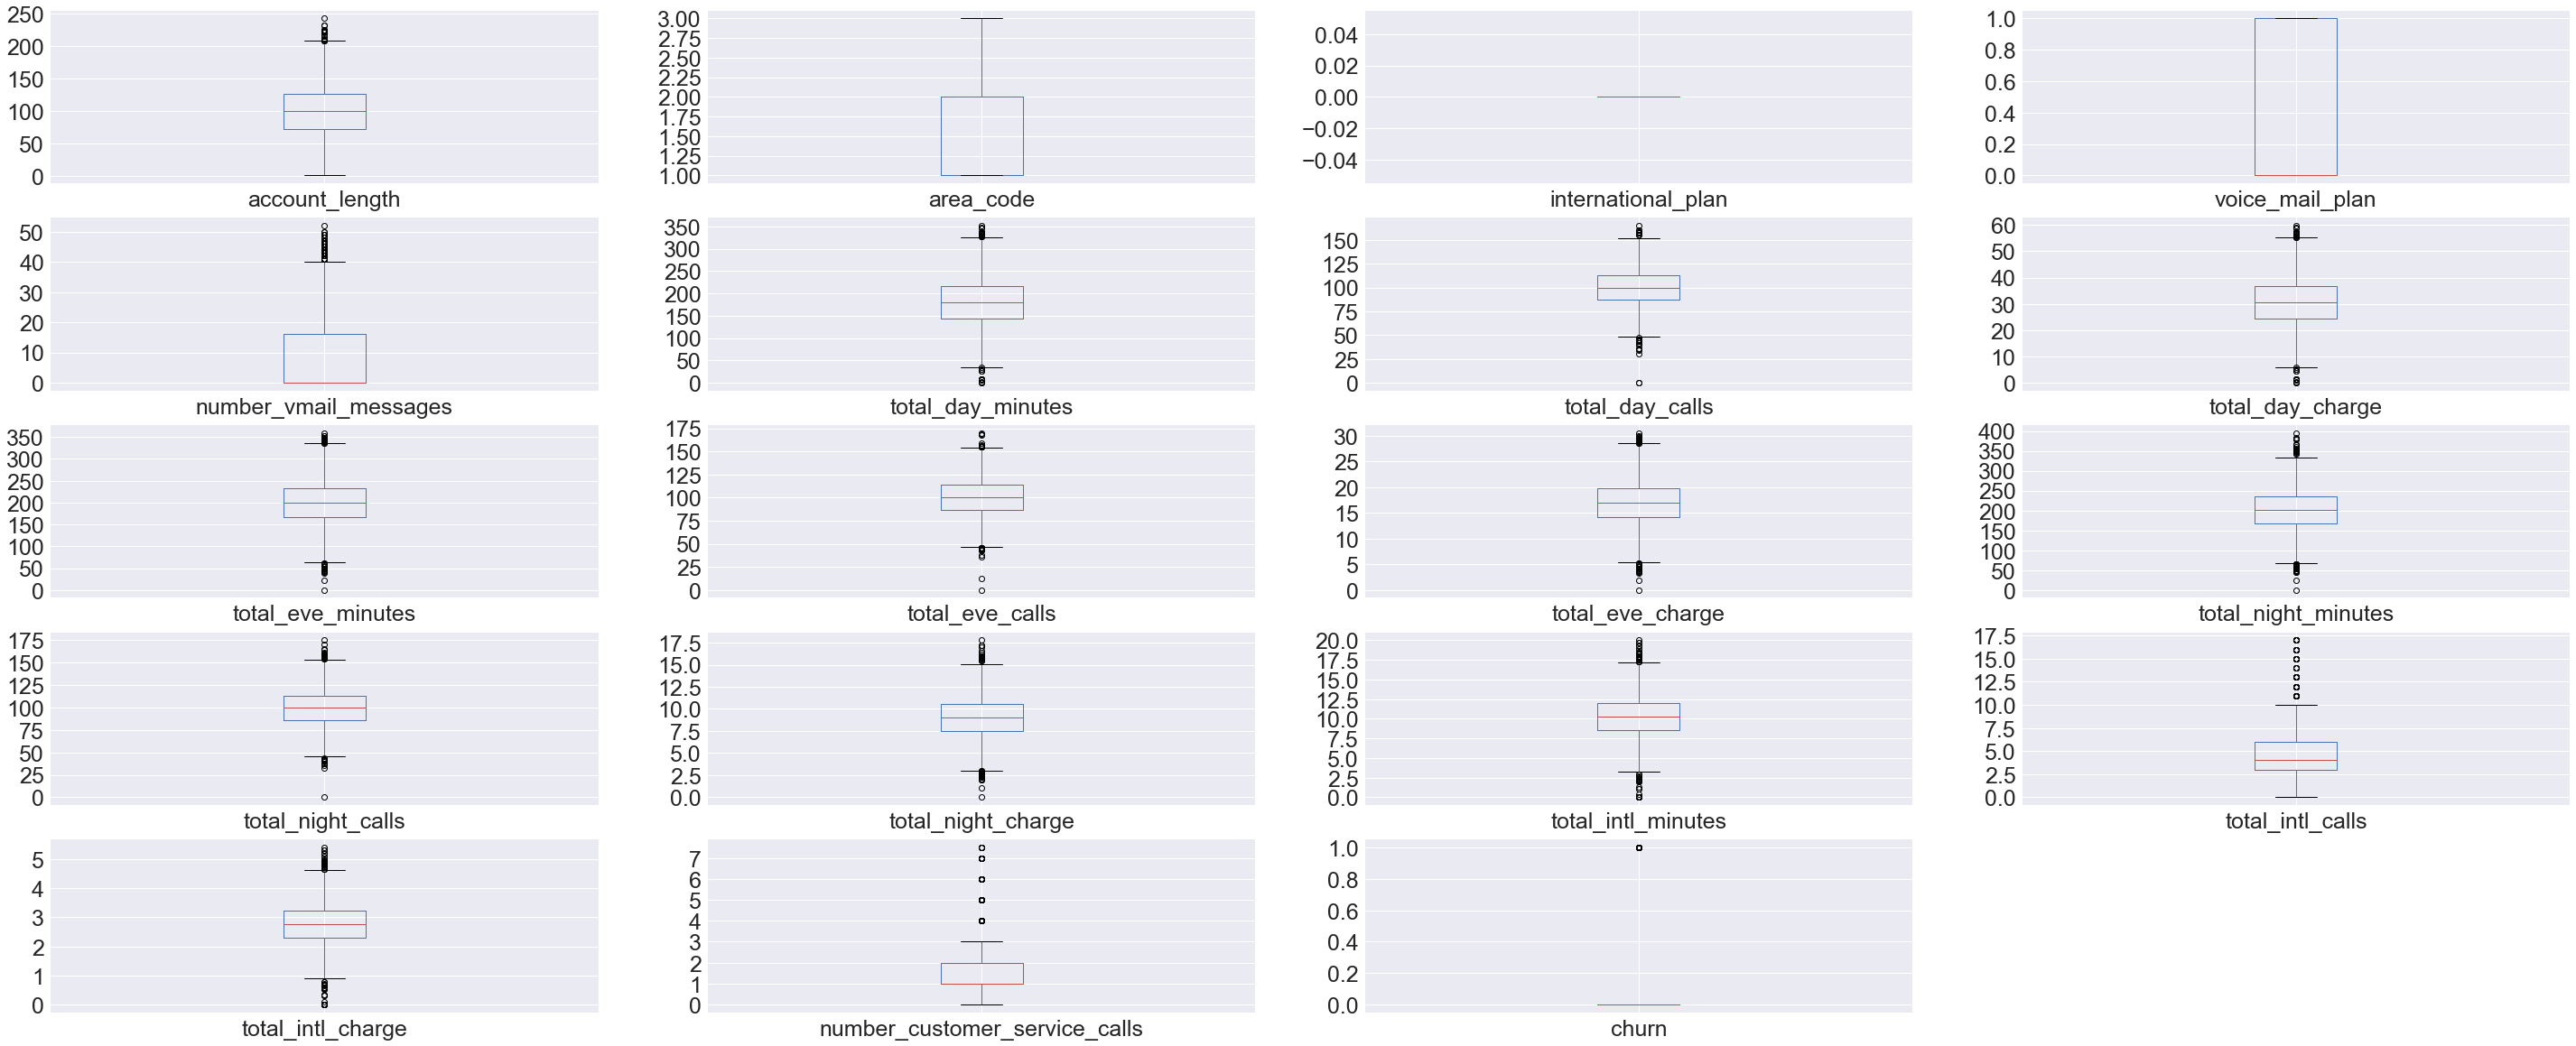

In [26]:
train_data1.plot(kind='box', subplots=True, layout=(12,4), sharex=False, sharey=False,fontsize=25, figsize = (50, 50))
plt.show()

In [27]:
# Shape of dataset

print("The shape of original dataset: ",train_data.shape)
print("The shape of dataset after outlier removal: ",train_data1.shape)

The shape of original dataset:  (4250, 20)
The shape of dataset after outlier removal:  (4250, 20)


### D. Bivariate Analysis

In [28]:
print(num_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


<AxesSubplot:xlabel='state'>

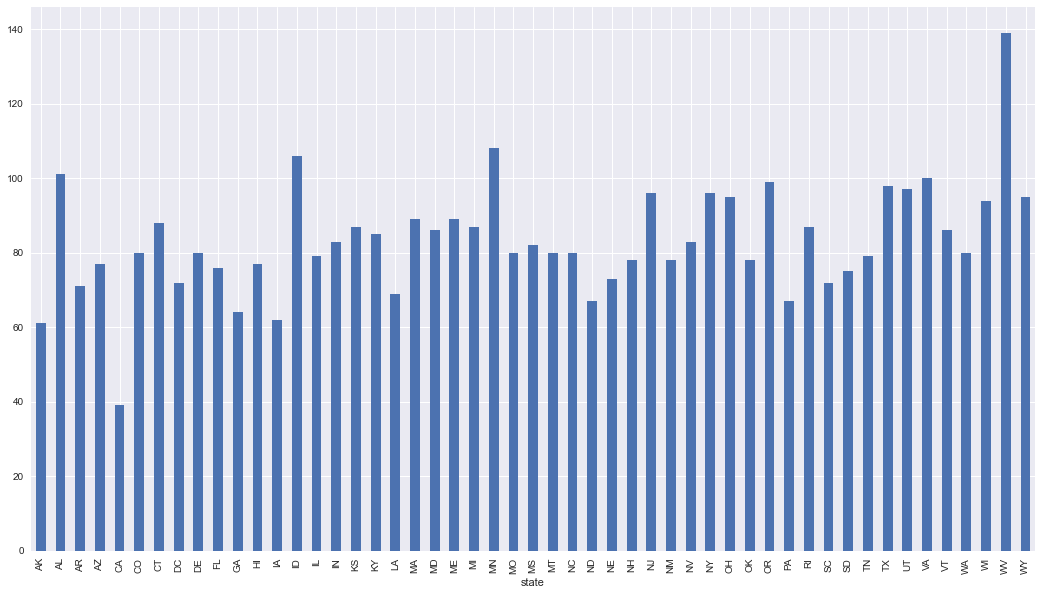

In [29]:
# Churn data groupby state variable

fig,ax = plt.subplots(figsize = (18,10)) 
x = train_data1.groupby('state')[['churn']].size()
x.plot.bar()

In [30]:
# FacetGrid Function

def facet(data,y):
    g = sns.FacetGrid(data,col = 'churn',size = 5)
    g.map(plt.hist,y,alpha = 0.5)
    g.add_legend()
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


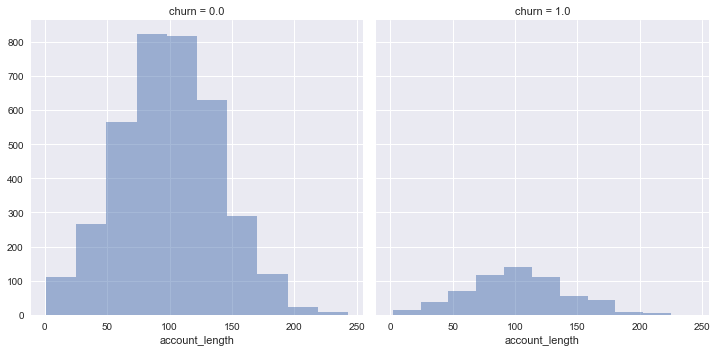

In [31]:
# Account_length across churn status

facet(train_data1,'account_length')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


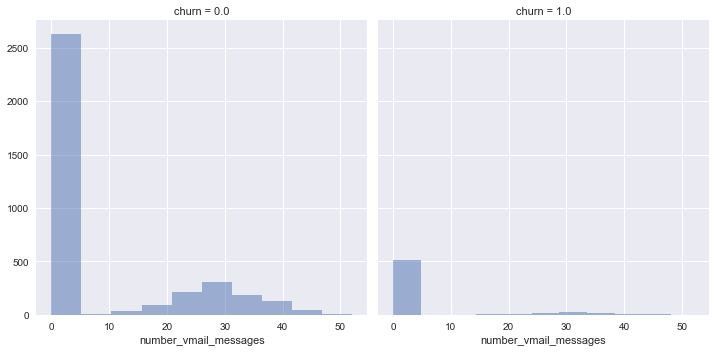

In [32]:
# number_vmail_messages across churn status

facet(train_data1,'number_vmail_messages')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


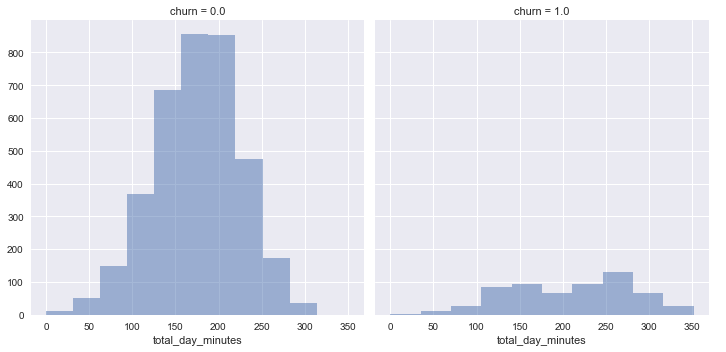

In [33]:
# total_day_minutes across churn status

facet(train_data1,'total_day_minutes')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


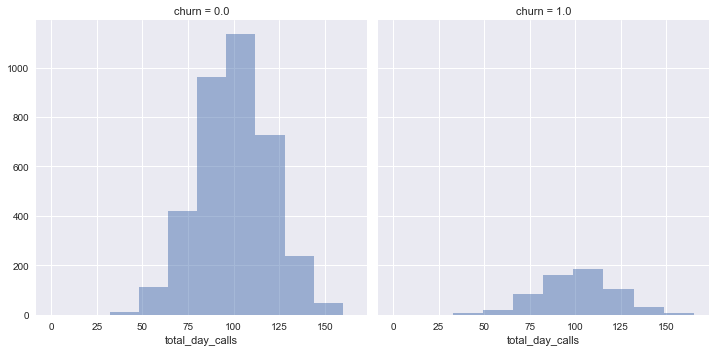

In [34]:
# total_day_calls across churn status

facet(train_data1,'total_day_calls')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


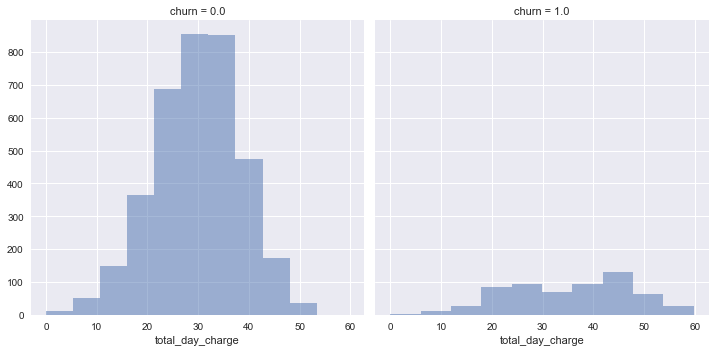

In [35]:
# total_day_charge across churn status

facet(train_data1,'total_day_charge')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


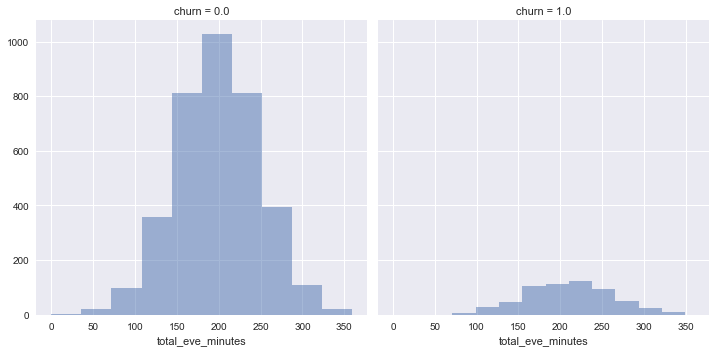

In [36]:
# total_eve_minutes across churn status

facet(train_data1,'total_eve_minutes')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


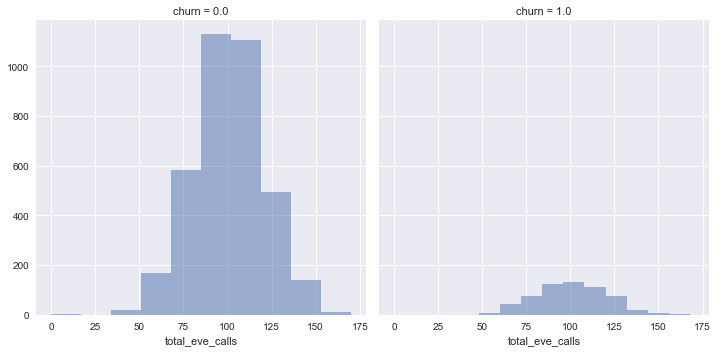

In [37]:
# total_eve_calls across churn status

facet(train_data1,'total_eve_calls')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


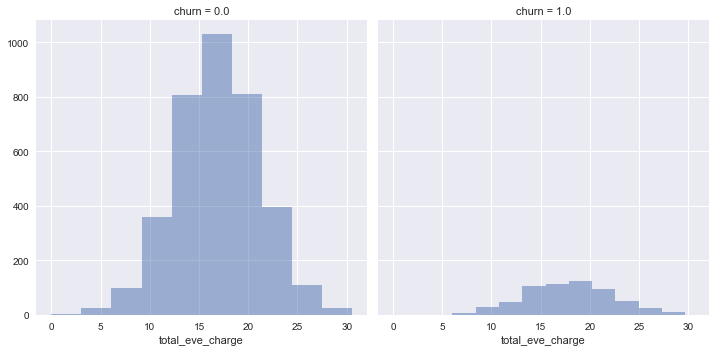

In [38]:
# total_eve_charge across churn status

facet(train_data1,'total_eve_charge')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


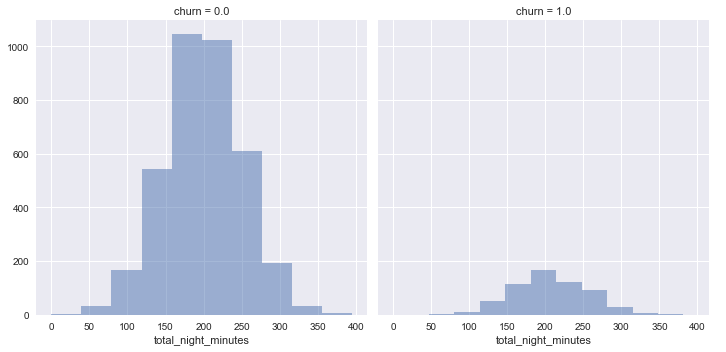

In [39]:
# total_night_minutes across churn status

facet(train_data1,'total_night_minutes')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


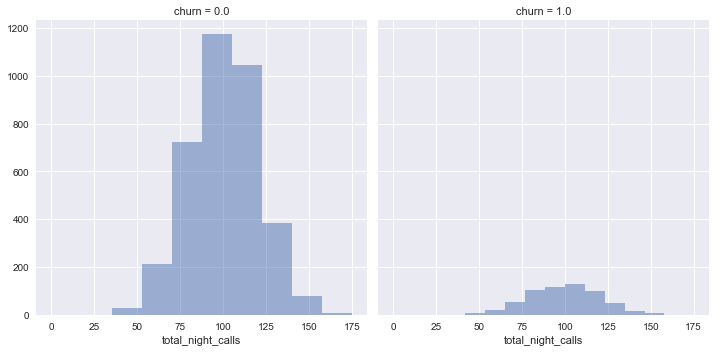

In [40]:
# total_night_calls across churn status

facet(train_data1,'total_night_calls')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


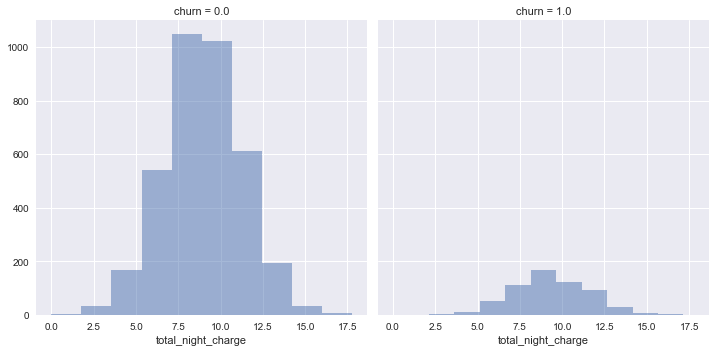

In [41]:
# total_night_charge across churn status

facet(train_data1,'total_night_charge')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


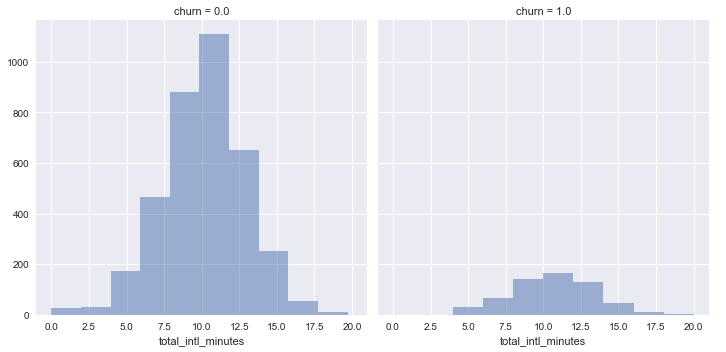

In [42]:
# total_intl_minutes across churn status

facet(train_data1,'total_intl_minutes')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


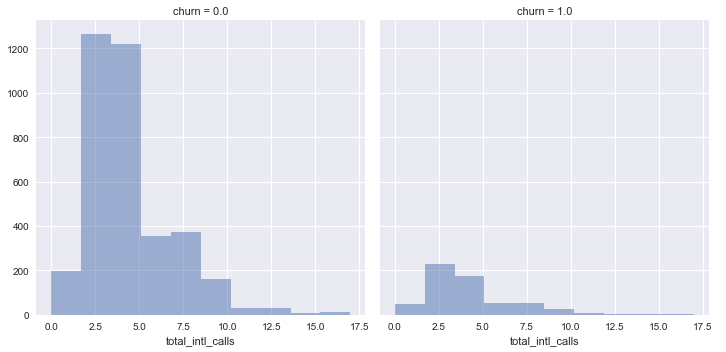

In [43]:
# total_intl_calls across churn status

facet(train_data1,'total_intl_calls')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


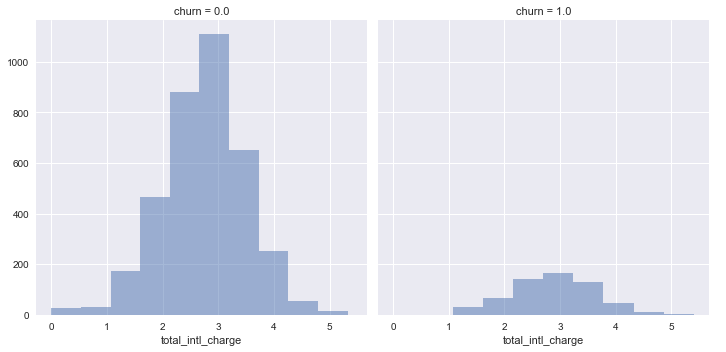

In [44]:
# total_intl_charge across churn status

facet(train_data1,'total_intl_charge')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


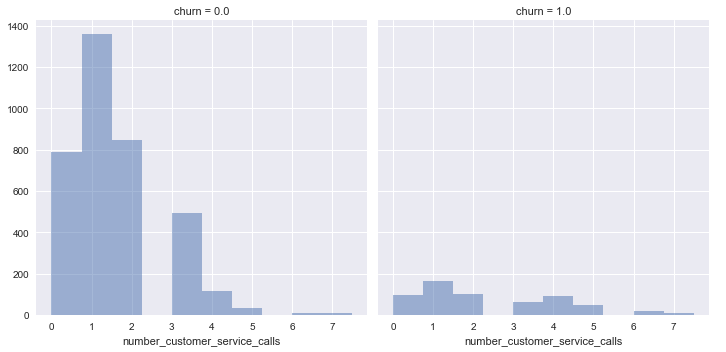

In [45]:
# number_customer_service_calls across churn status

facet(train_data1,'number_customer_service_calls')

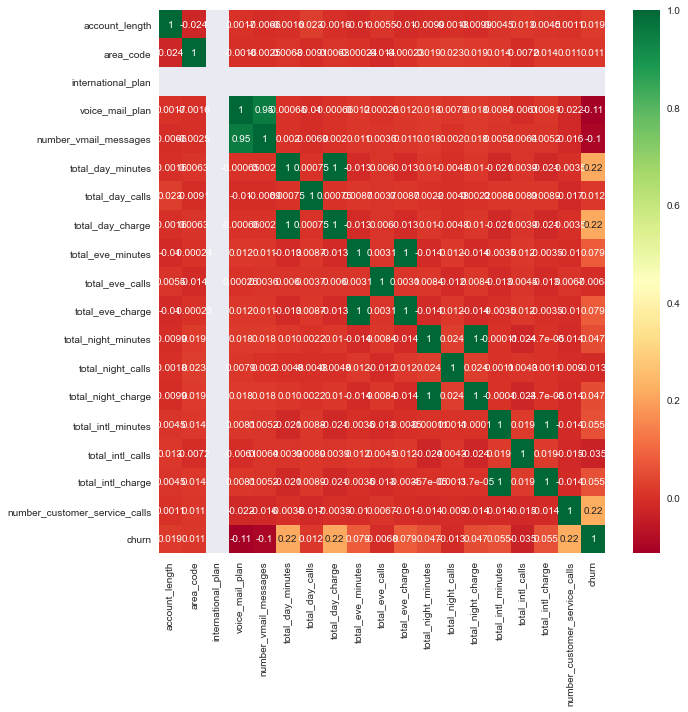

In [46]:
# Correlation matrix

fig = plt.figure(figsize=(10, 10))
train_data1_corr = train_data1.corr()
ax = sns.heatmap(train_data1_corr, annot = True, cmap = "RdYlGn")

As we can see from correlation matrix that total_day_charge - total_day_minutes, total_eve_charge - total_eve_minutes, total_night_charge - total_night_charge, tota_intl_charge - total_intl_minutes. So we can drop 1 column from each combination, so let's drop the column that has the least correlation with the churn variable. 

In [47]:
col_drop = ['total_day_minutes','total_night_minutes','total_eve_minutes','total_intl_minutes']

train_data2 = train_data1.copy()
train_data2 = train_data2.drop(columns = col_drop,axis = 1)

In [48]:
# Shape of dataset

print("The shape of original dataset: ",train_data.shape)
print("The shape of dataset after outlier removal: ",train_data1.shape)
print("The shape of dataset after highly correlated variables removal: ",train_data2.shape)

The shape of original dataset:  (4250, 20)
The shape of dataset after outlier removal:  (4250, 20)
The shape of dataset after highly correlated variables removal:  (4250, 16)


### E. Data Transformation

In [49]:
# Defining X and y 

train_data3 = train_data2.copy()

X = train_data3.drop(['churn','state','area_code'],axis = 1)
y = train_data3['churn']

X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107.0,0.0,1.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0
1,137.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0
2,84.0,0.0,0.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0
3,75.0,0.0,0.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0
4,121.0,0.0,1.0,24.0,88.0,37.09,108.0,29.62,118.0,9.57,7.0,2.03,3.0


In [50]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X1 = pd.DataFrame(X_std, index = train_data2.index, columns = train_data2.columns[1:14])
X1.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge
0,0.170399,0.0,1.679864,1.366857,1.163449,-0.345788,0.141841,-0.092493,0.157309,1.070820,-0.581053,1.248591,-0.427166
1,0.926186,0.0,-0.595286,-0.567911,0.710014,1.169295,0.493490,-1.572341,0.207083,-0.752053,0.234898,0.698342,-1.192536
2,-0.409038,0.0,-0.595286,-0.567911,-1.456398,2.206218,-0.611691,-2.752473,-0.539526,-0.072337,1.050849,-1.328187,0.338203
3,-0.635774,0.0,-0.595286,-0.567911,0.659633,-0.251027,1.096316,-1.031447,1.053239,-0.270956,-0.581053,-0.053219,1.103573
4,0.523099,0.0,1.679864,1.218029,-0.599910,0.702027,0.393019,2.951497,0.903917,0.241038,1.050849,-0.992669,1.103573


In [51]:
train_data2.index

RangeIndex(start=0, stop=4250, step=1)

In [52]:
train_data3['state'] = train_data2['state']
train_data3['churn'] = train_data2['churn']
train_data3['area_code'] = train_data2['area_code']

train_data3.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,2.0,0.0,1.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0
1,NJ,137.0,2.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0
2,OH,84.0,1.0,0.0,0.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0.0
3,OK,75.0,2.0,0.0,0.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0.0
4,MA,121.0,3.0,0.0,1.0,24.0,88.0,37.09,108.0,29.62,118.0,9.57,7.0,2.03,3.0,0.0


In [53]:
# Get Dummies Method on State Variable and Area Code 

State = train_data3[["state"]]

State = pd.get_dummies(State, drop_first= True)

In [54]:
State.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Concatenating the get dummies data to dataset

train_data4 = train_data3.copy()

train_data4 = pd.concat([train_data3, State], axis = 1)
train_data4.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,OH,107.0,2.0,0.0,1.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NJ,137.0,2.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,OH,84.0,1.0,0.0,0.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OK,75.0,2.0,0.0,0.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,MA,121.0,3.0,0.0,1.0,24.0,88.0,37.09,108.0,29.62,118.0,9.57,7.0,2.03,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Dropping Original state and area_code columns

train_data4.drop(["state"], axis = 1, inplace = True)

In [57]:
train_data4.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,107.0,2.0,0.0,1.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,137.0,2.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84.0,1.0,0.0,0.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,75.0,2.0,0.0,0.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,121.0,3.0,0.0,1.0,24.0,88.0,37.09,108.0,29.62,118.0,9.57,7.0,2.03,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# Shape of dataset

print("The shape of original dataset: ",train_data.shape)
print("The shape of dataset after outlier removal: ",train_data1.shape)
print("The shape of dataset after highly correlated variables removal: ",train_data2.shape)
print("The shape of dataset after applying standard scaler: ",train_data3.shape)
print("The shape of dataset after applying get dummies method: ",train_data4.shape)

The shape of original dataset:  (4250, 20)
The shape of dataset after outlier removal:  (4250, 20)
The shape of dataset after highly correlated variables removal:  (4250, 16)
The shape of dataset after applying standard scaler:  (4250, 16)
The shape of dataset after applying get dummies method:  (4250, 65)


In [61]:
# Checking balance of data

train_data5 = train_data3.copy()
X = train_data5.drop(['churn','state'],axis = 1)
y = train_data5['churn']

print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))

Before OverSampling, the shape of X: (4250, 14)
Before OverSampling, the shape of y: (4250,) 

Before OverSampling, counts of label '0': 3652
Before OverSampling, counts of label '1': 598


In [62]:
# using SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X, y = sm.fit_resample(X, y.ravel())

In [63]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))

After OverSampling, the shape of X: (7304, 14)
After OverSampling, the shape of y: (7304,) 

After Sampling, counts of label '0': 3652
After OverSampling, counts of label '1': 3652


## F. Model Building 

### 1. Logistic Regression Using all Variables

In [65]:
# Defining X and Y

X_new = train_data4.drop(['churn'],axis = 1)
y_new = train_data4['churn']

In [66]:
# Splitting data

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3,random_state = 42)

In [67]:
lr_model = LogisticRegression(random_state = 42, class_weight='balanced', max_iter = 1000)
lr_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [68]:
print('classes: ', lr_model.classes_)
print('coefficients: ', lr_model.coef_)
print('intercept :', lr_model.intercept_)

classes:  [0. 1.]
coefficients:  [[ 1.90100517e-03  1.20362890e-01  0.00000000e+00 -1.91177263e+00
   3.11259157e-02  5.02350773e-04  7.28817952e-02  9.80004243e-04
   5.84227198e-02 -5.29903128e-04  6.31951251e-02 -6.53143151e-02
   2.20015451e-01  5.30756603e-01 -3.45133492e-01  1.29738656e-01
  -3.96424701e-01  6.47678311e-01 -3.76442098e-01  5.42182180e-01
  -8.14465025e-01  1.79956725e-01 -2.38718513e-01 -7.11329795e-02
  -1.32601428e+00 -4.68831700e-01 -1.19703959e-01 -7.38636409e-02
  -1.86276991e-01  3.38429979e-03  3.81831179e-01 -1.16182015e-01
   5.18156375e-01  4.69030511e-01  2.45681805e-01  4.38852289e-01
  -1.99003250e-01 -2.81863857e-01  4.01684151e-01  8.13627444e-01
   3.60527149e-01 -3.30798811e-02 -6.57448488e-01 -2.02036126e-03
   6.82382951e-01 -1.96922644e-01  4.46159607e-01  2.33212342e-01
  -2.52754021e-01  3.34993812e-01 -6.97573642e-01  1.56286806e-01
  -1.06814526e+00 -2.60316520e-01  5.77059828e-02  5.60672567e-01
   9.77288888e-02 -4.71810303e-01 -1.539344

In [69]:
predict = lr_model.predict(X_test)

In [70]:
labels = [1, 0]
con_mat = confusion_matrix(y_test, predict, labels = labels)
print(con_mat)

[[129  66]
 [314 766]]


In [71]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print(accuracy)
print(lr_model.score(X_test, y_test))
np.mean(y_test == predict)

0.7019607843137254
0.7019607843137254


0.7019607843137254

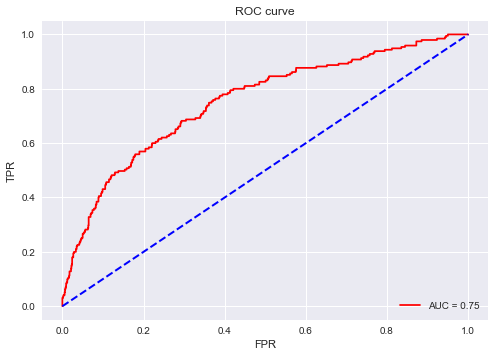

In [72]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [73]:
print("ROC Accuracy: ",roc_auc_score(y_test, preds))

ROC Accuracy:  0.7517616334283002


In [74]:
actual = y_test
predicted = predict
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      1080
         1.0       0.29      0.66      0.40       195

    accuracy                           0.70      1275
   macro avg       0.61      0.69      0.60      1275
weighted avg       0.82      0.70      0.74      1275



### 2. Logistic Regression (SMOTE Dataset)

In [75]:
# Splitting data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [76]:
lr_model = LogisticRegression(random_state = 42, class_weight='balanced', max_iter = 1000)
lr_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [77]:
print('classes: ', lr_model.classes_)
print('coefficients: ', lr_model.coef_)
print('intercept :', lr_model.intercept_)

classes:  [0. 1.]
coefficients:  [[ 2.76524178e-03  6.43797447e-02  0.00000000e+00 -1.65146995e+00
   2.09515742e-02 -3.59905037e-04  7.88651666e-02 -1.85679560e-03
   7.12245539e-02 -2.18176906e-03  8.61926203e-02 -6.91190302e-02
   4.47259481e-01  6.23496439e-01]]
intercept : [-6.51882126]


In [78]:
predict = lr_model.predict(X_test)

In [79]:
labels = [1, 0]
con_mat = confusion_matrix(y_test, predict, labels = labels)
print(con_mat)

[[784 287]
 [287 834]]


In [80]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print(accuracy)
print(lr_model.score(X_test, y_test))
np.mean(y_test == predict)

0.7381386861313869
0.7381386861313869


0.7381386861313869

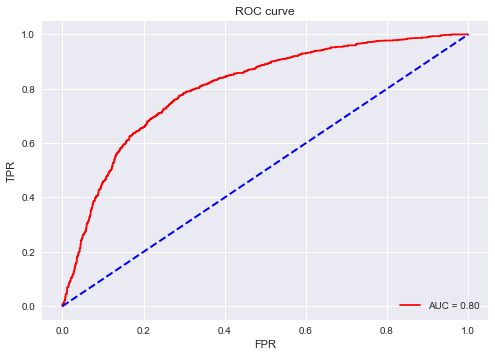

In [81]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [82]:
print("ROC Accuracy: ",roc_auc_score(y_test, preds))

ROC Accuracy:  0.8030028544275277


In [83]:
actual = y_test
predicted = predict
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      1121
         1.0       0.73      0.73      0.73      1071

    accuracy                           0.74      2192
   macro avg       0.74      0.74      0.74      2192
weighted avg       0.74      0.74      0.74      2192



### 3. Random Forest Regressor Model (All Variables)

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3,random_state = 42)

In [85]:
X_train.shape

(2975, 64)

In [87]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 42)
for_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [88]:
predict = for_reg.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error,accuracy_score

acc = accuracy_score(predict.round(),y_test)
print("Accuracy: ",acc)

Accuracy:  0.9098039215686274


In [90]:
mse = mean_squared_error(predict.round(),y_test)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  0.30032661958503204


In [91]:
print("ROC Accuracy: ",roc_auc_score(y_test, predict))

ROC Accuracy:  0.8397079772079772


### 4. Random Forest Regressor Model removing State Variable

In [116]:
#Train-Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [95]:
X_train.shape

(5112, 14)

In [96]:
y_train.shape

(5112,)

In [98]:
from sklearn.ensemble import RandomForestRegressor
for_reg1 = RandomForestRegressor(random_state = 42)
for_reg1.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [117]:
predict1 = for_reg1.predict(X_test)

acc1 = accuracy_score(predict1.round(),y_test)
mse = mean_squared_error(predict1.round(),y_test)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
print("Accuracy: ", acc1)

RMSE:  0.23397548065437382
Accuracy:  0.9452554744525548


In [103]:
print("ROC Accuracy: ",roc_auc_score(y_test, predict1))

ROC Accuracy:  0.977017985308902


### 5. Fine Tuning Random Forest Regressor Model 4

In [106]:
# Rearranging columns to fit best on the GUI

X_train2 = X_train[['area_code','international_plan','voice_mail_plan','account_length','number_vmail_messages',
                     'total_day_calls','total_day_charge','total_eve_calls','total_eve_charge','total_night_calls',
                     'total_night_charge','total_intl_calls','total_intl_charge','number_customer_service_calls']]

In [107]:
# Using Grid Search CV

param_grid = [{'n_estimators':[10,100,1000] ,'max_features':[2,4,6,8,16]}]
grid_search = GridSearchCV(for_reg,param_grid,cv = 3,scoring = 'neg_mean_squared_error',return_train_score = True,n_jobs = 3)
grid_search.fit(X_train2,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.0824198  -0.07164382 -0.07018402 -0.07095853 -0.06037739 -0.0595558
 -0.06562793 -0.05610759 -0.05511508 -0.06247457 -0.05442463 -0.05361031
         nan         nan         nan]
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.01543818 -0.00992842 -0.00923964 -0.01321009 -0.00835703 -0.00785062
 -0.01190239 -0.00773501 -0.00724162 -0.01128326 -0.0074226  -0.00701769
         nan         nan         nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=3,
             param_grid=[{'max_features': [2, 4, 6, 8, 16],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
print("Best parameters: ",grid_search.best_params_)
print("Best estimators: ",grid_search.best_estimator_)

Best parameters:  {'max_features': 8, 'n_estimators': 1000}
Best estimators:  RandomForestRegressor(max_features=8, n_estimators=1000, random_state=42)


In [109]:
y_pred = grid_search.predict(X_test)
y_pred = y_pred.round()
score = accuracy_score(y_pred,y_test)
print( "Accuracys is"+" "+ str(score*100),"%")

Accuracys is 92.7463503649635 %


In [110]:
X_train2.head()

,area_code,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
6823,2.000000,0.0,0.000000,119.125876,0.000000,128.551051,28.259348,97.850350,20.968909,56.425175,9.365398,2.574825,3.372377,2.874124
3166,1.000000,0.0,0.000000,113.000000,0.000000,115.000000,33.760000,106.000000,21.930000,104.000000,11.060000,6.000000,2.750000,1.000000
2836,2.000000,0.0,1.000000,63.000000,32.000000,124.000000,37.210000,125.000000,18.220000,120.000000,11.710000,3.000000,3.480000,1.000000
6840,2.000000,0.0,0.930476,79.860952,30.705711,109.208572,32.964763,68.834287,13.036982,119.347620,9.582153,3.930476,3.115943,0.930476
4262,1.747079,0.0,0.000000,113.011685,0.000000,92.505843,19.940633,138.700338,12.565715,78.747079,7.431994,3.505843,3.617780,5.000000


In [111]:
X_train2.shape

(5112, 14)

In [112]:
actual = y_test
predicted = y_pred
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1121
         1.0       0.93      0.92      0.93      1071

    accuracy                           0.93      2192
   macro avg       0.93      0.93      0.93      2192
weighted avg       0.93      0.93      0.93      2192



## G. Saving model to pickle file

In [113]:
import pickle
# open a file, where you ant to store the data
file = open('churn_pred.pkl', 'wb')

# dump information to that file
pickle.dump(grid_search, file)

In [114]:
model = open('churn_pred.pkl','rb')
forest = pickle.load(model)

In [115]:
file.close()